# Autoregressive Moving Average (ARMA): Sunspots data

In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
%matplotlib inline

In [2]:
from statsmodels.graphics.api import qqplot

## Sunpots Data

In [3]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [4]:
dta = sm.datasets.sunspots.load_pandas().data

In [10]:
dta.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31', 
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None, tz=None)

In [5]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

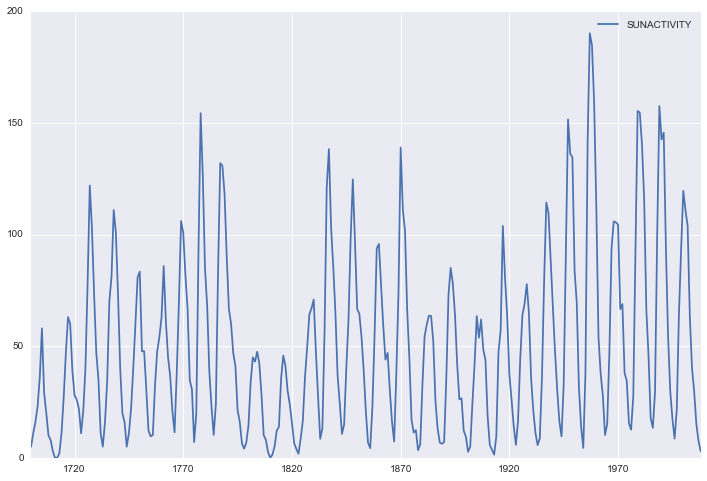

In [7]:
dta.plot(figsize=(12,8))

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:620: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


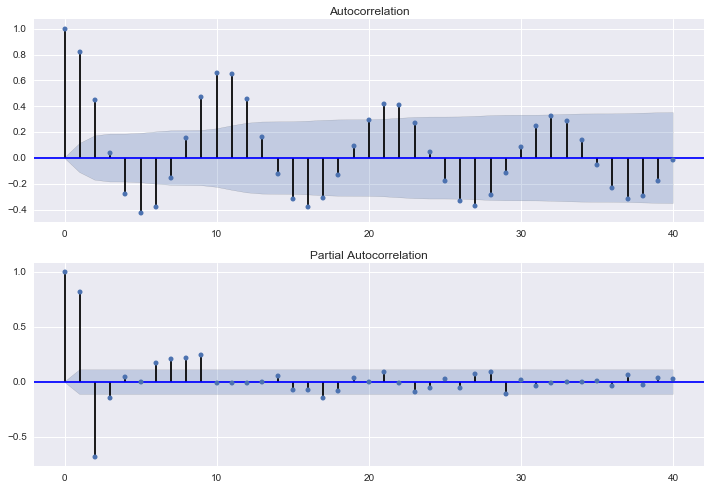

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [9]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print(arma_mod20.params)

const                49.659374
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [6]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

In [11]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.63633806 2637.56970317 2628.60672591


In [12]:
print(arma_mod30.params)

const                49.749873
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64


In [13]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.4036287 2638.07033508 2626.8666135


* Does our model obey the theory?

In [14]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564814002571953

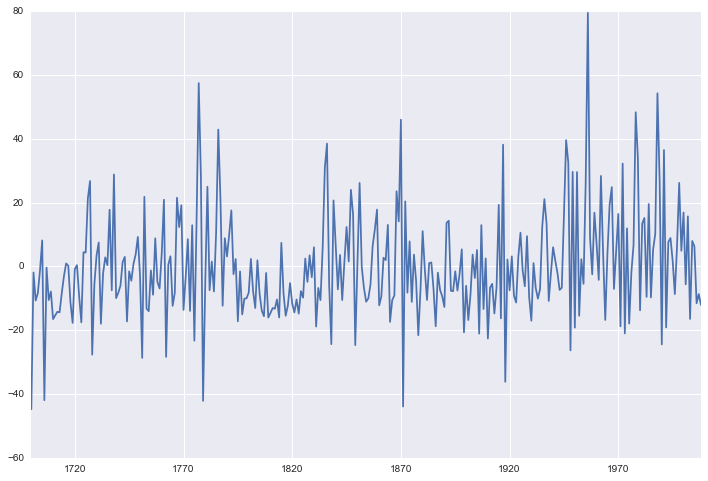

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [16]:
resid = arma_mod30.resid

In [17]:
stats.normaltest(resid)

NormaltestResult(statistic=49.845004716319792, pvalue=1.5007029996843931e-11)

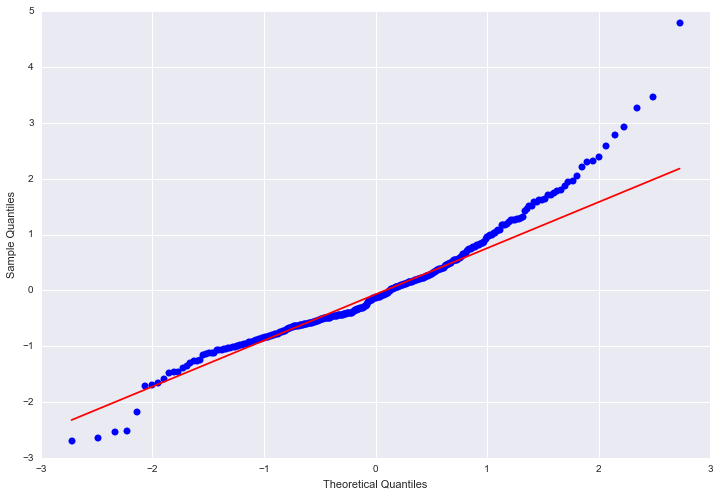

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [19]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q      Prob(>Q)
lag                                   
1    0.009178   0.026285  8.712063e-01
2    0.041793   0.573037  7.508731e-01
3   -0.001335   0.573597  9.024492e-01
4    0.136089   6.408913  1.706208e-01
5    0.092468   9.111820  1.046863e-01
6    0.091948  11.793234  6.674370e-02
7    0.068748  13.297190  6.519008e-02
8   -0.015020  13.369219  9.976165e-02
9    0.187592  24.641891  3.393933e-03
10   0.213718  39.321963  2.229502e-05
11   0.201082  52.361094  2.344992e-07
12   0.117182  56.804138  8.574437e-08
13  -0.014055  56.868276  1.893940e-07
14   0.015398  56.945515  3.997737e-07
15  -0.024967  57.149270  7.741618e-07
16   0.080916  59.296723  6.872288e-07
17   0.041138  59.853692  1.110963e-06
18  -0.052021  60.747383  1.548458e-06
19   0.062496  62.041646  1.831674e-06
20  -0.010302  62.076934  3.381297e-06
21   0.074453  63.926606  3.193640e-06
22   0.124955  69.154719  8.978521e-07
23   0.093162  72.070981  5.799894e-07
24  -0.082152  74.346636 

* This indicates a lack of fit.

* In-sample dynamic prediction. How good does our model do?

In [7]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047409
1991-12-31    140.992981
1992-12-31     94.859078
1993-12-31     46.860848
1994-12-31     11.242515
1995-12-31     -4.721378
1996-12-31     -1.167007
1997-12-31     16.185594
1998-12-31     39.021792
1999-12-31     59.449793
2000-12-31     72.170080
2001-12-31     75.376735
2002-12-31     70.436417
2003-12-31     60.731545
2004-12-31     50.201749
2005-12-31     42.075970
2006-12-31     38.114219
2007-12-31     38.454567
2008-12-31     41.963735
2009-12-31     46.869207
2010-12-31     51.423185
2011-12-31     54.399649
2012-12-31     55.321628
Freq: A-DEC, dtype: float64


In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [ ]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [ ]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

### Simulated ARMA(4,1): Model Identification is Difficult

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

In [ ]:
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

Let's make sure this model is estimable.

In [ ]:
arma_t = ArmaProcess(arparams, maparams)

In [ ]:
arma_t.isinvertible()

In [ ]:
arma_t.isstationary()

* What does this mean?

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(size=50));

In [ ]:
arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary()

In [ ]:
arma_rvs = arma_t.generate_sample(size=500, burnin=250, scale=2.5)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

* For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags. 
* The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

In [ ]:
arma11 = sm.tsa.ARMA(arma_rvs, (1,1)).fit()
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

In [ ]:
arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit()
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

### Exercise: How good of in-sample prediction can you do for another series, say, CPI

In [ ]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

#### Hint: 

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

P-value of the unit-root test, resoundly rejects the null of no unit-root.

In [ ]:
print(sm.tsa.adfuller(cpi)[1])